<a href="https://colab.research.google.com/github/Anirudh-sk/LoanPredict/blob/master/Loan_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score




In [120]:
url= './drive/MyDrive/Loan Predict/loan-train.csv'
df = pd.read_csv(url)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [121]:
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [122]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [123]:
df.dropna(inplace=True) # Remove empty cells
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [124]:
to_drop=['Loan_ID', 'Gender']
df.drop(to_drop, inplace=True, axis=1)
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [125]:
df['Married'] = df['Married'].replace('Yes', 1)
df['Married'] = df['Married'].replace('No', 0)

df['Education'] = df['Education'].replace('Graduate', 1)
df['Education'] = df['Education'].replace('Not Graduate', 0)

df['Property_Area'] = df['Property_Area'].replace('Urban', 1)
df['Property_Area'] = df['Property_Area'].replace('Rural', 2)
df['Property_Area'] = df['Property_Area'].replace('Semiurban', 3)

df['Self_Employed'] = df['Self_Employed'].replace('Yes', 1)
df['Self_Employed'] = df['Self_Employed'].replace('No', 0)

df['Loan_Status'] = df['Loan_Status'].replace('Y', 1)
df['Loan_Status'] = df['Loan_Status'].replace('N', 0)

df['Dependents'] = df['Dependents'].replace('3+', 3)

df['ApplicantIncome'] = df['ApplicantIncome']*30
df['CoapplicantIncome'] = df['CoapplicantIncome']*30
df['LoanAmount'] = df['LoanAmount']*1000


df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,137490,45240.0,128000.0,360.0,1.0,2,0
2,1,0,1,1,90000,0.0,66000.0,360.0,1.0,1,1
3,1,0,0,0,77490,70740.0,120000.0,360.0,1.0,1,1
4,0,0,1,0,180000,0.0,141000.0,360.0,1.0,1,1
5,1,2,1,1,162510,125880.0,267000.0,360.0,1.0,1,1


<Axes: >

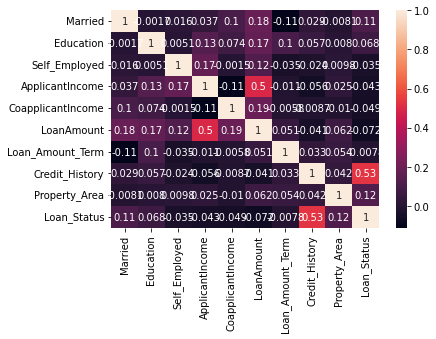

In [126]:
correlation = df.corr()
# print(correlation["Total"].sort_values(ascending=False))

sns.heatmap(data=correlation, annot=True)

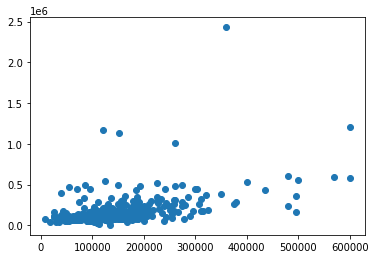

In [127]:
plt.scatter(df['LoanAmount'],df['ApplicantIncome'])

array([[<Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Self_Employed'}>],
       [<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>],
       [<Axes: title={'center': 'Loan_Amount_Term'}>,
        <Axes: title={'center': 'Credit_History'}>,
        <Axes: title={'center': 'Property_Area'}>],
       [<Axes: title={'center': 'Loan_Status'}>, <Axes: >, <Axes: >]],
      dtype=object)

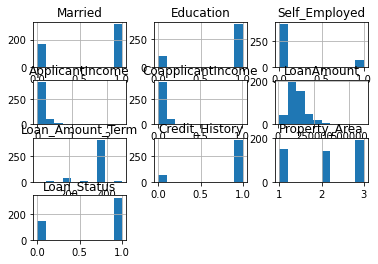

In [128]:
df.hist()

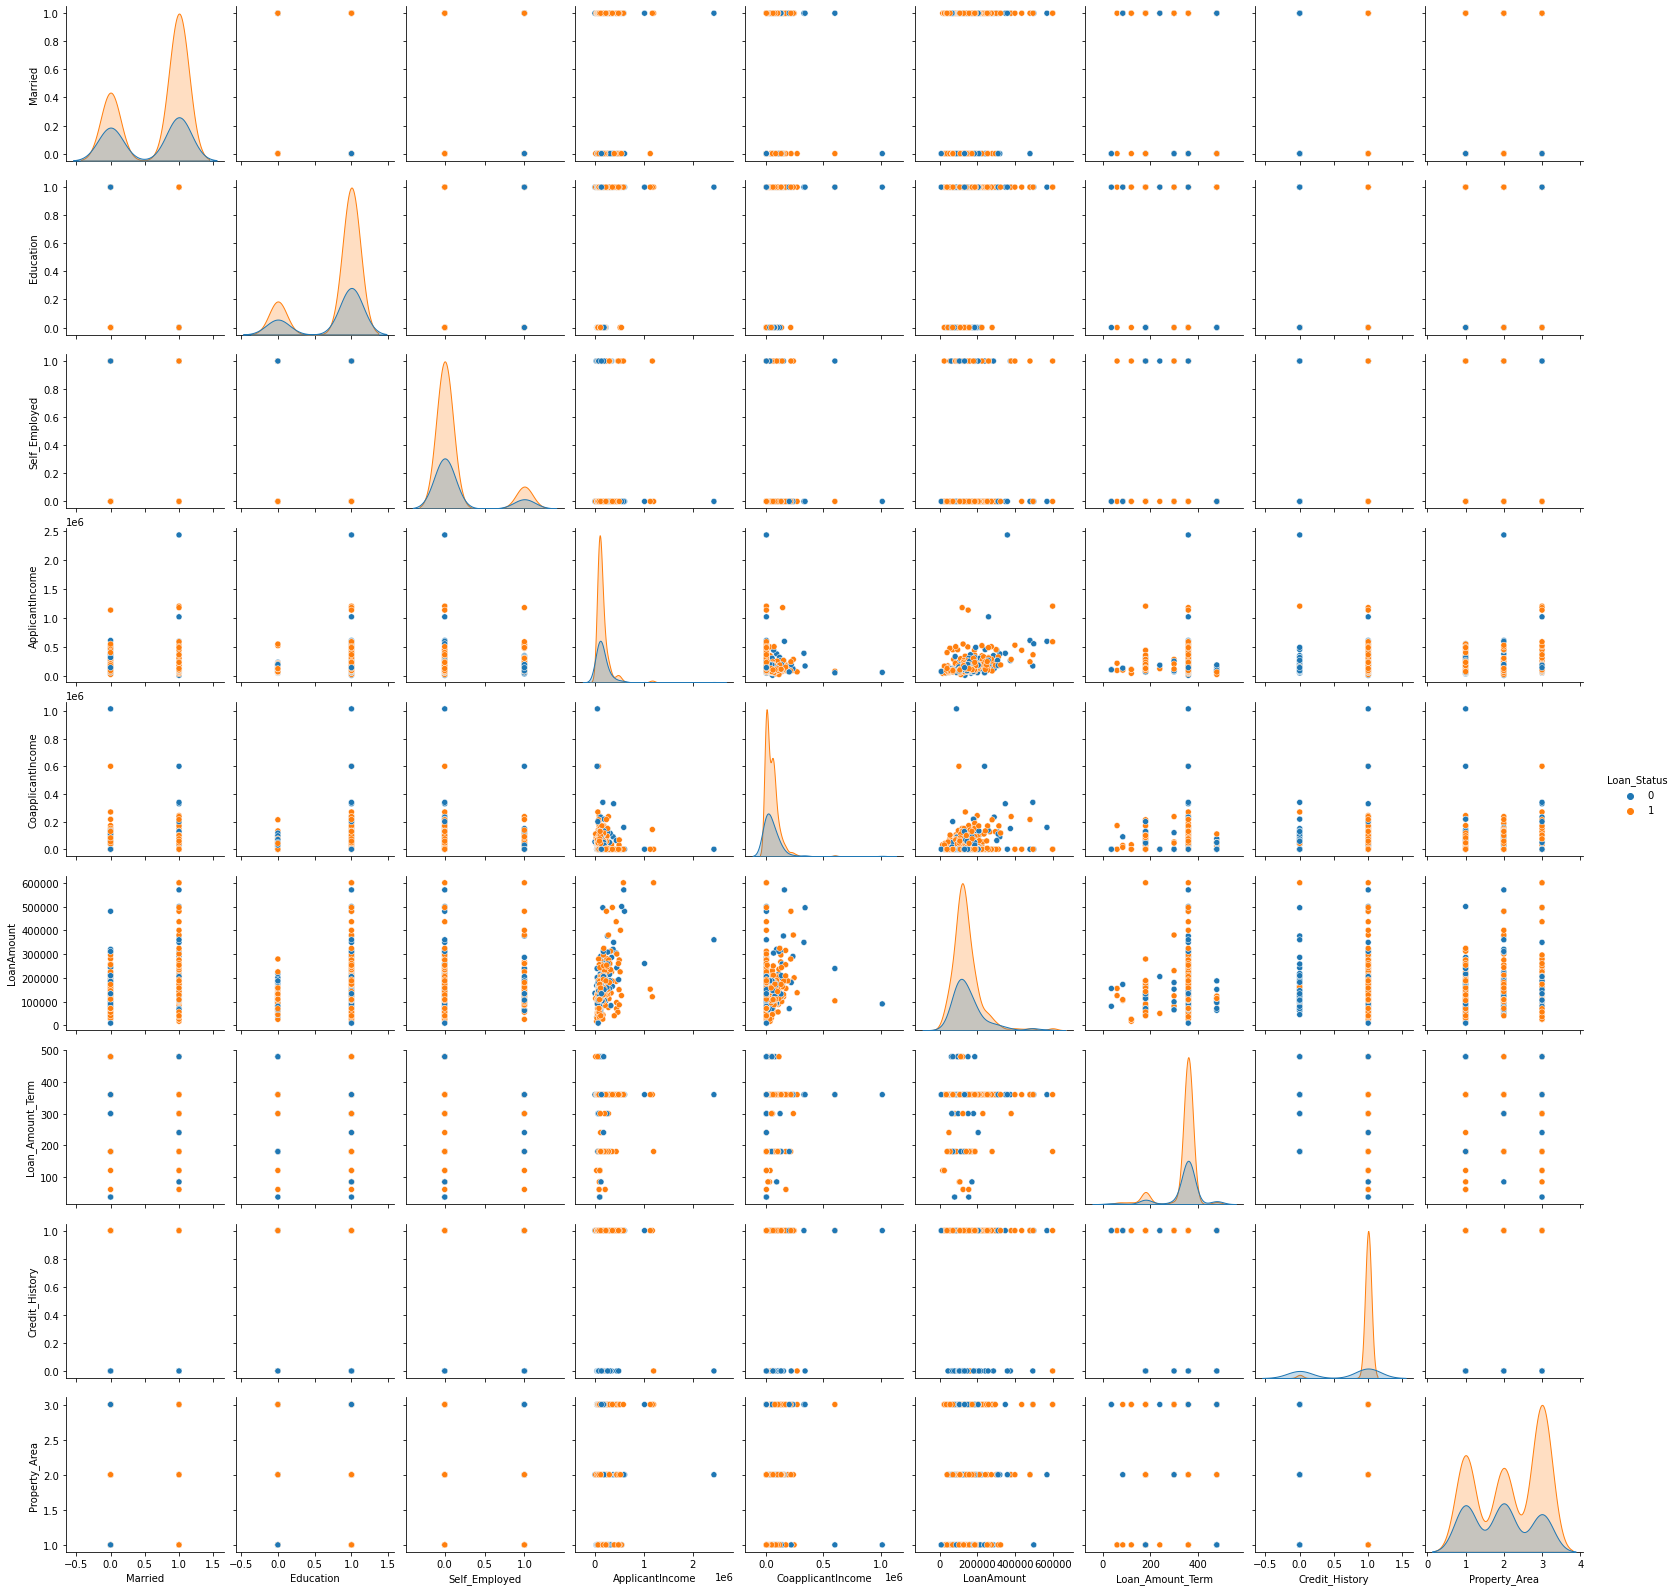

In [129]:
sns.pairplot(data=df, hue='Loan_Status')

In [130]:
df.head()


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,137490,45240.0,128000.0,360.0,1.0,2,0
2,1,0,1,1,90000,0.0,66000.0,360.0,1.0,1,1
3,1,0,0,0,77490,70740.0,120000.0,360.0,1.0,1,1
4,0,0,1,0,180000,0.0,141000.0,360.0,1.0,1,1
5,1,2,1,1,162510,125880.0,267000.0,360.0,1.0,1,1


In [147]:
X = df[['Married','Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]
y = df['Loan_Status']

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 100)
# model = LogisticRegression(solver='liblinear', random_state=0)
# model.fit(X_train, y_train)

In [151]:
clf_gini = DecisionTreeClassifier(max_depth=3)
  
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [152]:
y_pred = clf_gini.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
483,1,1
39,1,1
133,1,1
252,1,1
294,1,1
143,1,1
422,1,1
245,0,1
428,1,1
452,0,0


In [134]:
# y_pred = model.predict(X_test)
# df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df1

In [135]:
# model.score(X_test,y_pred)*100


In [153]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
      
print("Report : ", classification_report(y_test, y_pred))

Confusion Matrix:  [[ 5  6]
 [ 2 35]]
Accuracy :  83.33333333333334
Report :                precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.85      0.95      0.90        37

    accuracy                           0.83        48
   macro avg       0.78      0.70      0.73        48
weighted avg       0.82      0.83      0.82        48



[Text(0.5, 0.875, 'x[6] <= 0.5\ngini = 0.433\nsamples = 432\nvalue = [137, 295]'),
 Text(0.25, 0.625, 'x[5] <= 129000.0\ngini = 0.168\nsamples = 65\nvalue = [59, 6]'),
 Text(0.125, 0.375, 'x[5] <= 91500.0\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(0.0625, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.375, 0.375, 'x[5] <= 172000.0\ngini = 0.285\nsamples = 29\nvalue = [24, 5]'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.75, 0.625, 'x[5] <= 302000.0\ngini = 0.335\nsamples = 367\nvalue = [78, 289]'),
 Text(0.625, 0.375, 'x[4] <= 48375.0\ngini = 0.321\nsamples = 353\nvalue = [71, 282]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.6875, 0.125, 'gini = 0.313\nsamples = 345\nvalue = [67, 278]'),
 Text(0.875, 0.375, 'x[4] <= 367500.0\ngini = 0.5\nsamples = 14\nvalue = [7, 7

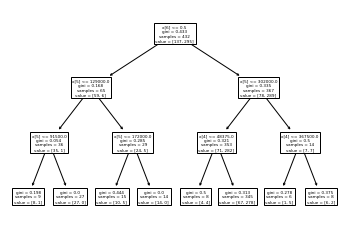

In [154]:
from sklearn import tree

tree.plot_tree(clf_gini)

# Enter the Values Manually

In [138]:
# X = df[['Married','Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]

Married = int(input("Enter 0 or 1 : "))
Dependents = int(input("Enter 0 or 1 or 2 or 3 : "))
Education = int(input("Enter 0 or 1 : "))
Self_Employed = int(input("Enter 0 or 1 : "))
ApplicantIncome = int(input("Enter monthly salary : "))
LoanAmount = int(input("Enter Loan Amount : "))
Credit_History = int(input("Enter 0 or 1 : "))

# atten = atten.reshape(-1,1)
own_pred = clf_gini.predict([[Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History]])
if own_pred[0] == 1:
  print("Loan Approved")
else : 
  print("Loan Rejected")

Enter 0 or 1 : 0
Enter 0 or 1 or 2 or 3 : 0
Enter 0 or 1 : 1
Enter 0 or 1 : 0
Enter monthly salary : 100000
Enter Loan Amount : 100
Enter 0 or 1 : 0
Loan Rejected


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# exporting the model using pickle

In [139]:
import pickle

In [140]:
# pickle.dump(clf_gini, open("./drive/MyDrive/Loan Predict/model.pkl", 'wb'))

# testing the pickle file

In [141]:
# pickled_model = pickle.load(open('./drive/MyDrive/Loan Predict/model.pkl', 'rb'))
# pickled_model.predict(X_test) 